In [1]:
import pandas as pd
from datetime import date
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM,Activation
import tensorflow as tf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, WindowAverage, SeasonalWindowAverage
import sktime as sktime
from sktime.utils.plotting import plot_series

C:\Users\User\anaconda\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
df = pd.read_csv('m-hsoldhst6312.txt', sep=' ')

In [4]:
df.head()

,year,mon,hsold,hstart
0,1963,1,42,79.0
1,1963,2,35,89.6
2,1963,3,44,124.8
3,1963,4,52,164.2
4,1963,5,58,172.7


In [5]:
df['Date'] = df['year'].astype(str)+' /'+df['mon'].astype(str)

In [6]:
df_new = df[['Date', 'hstart']]

In [7]:
df_new.set_index('Date', inplace=True)
df_new

,hstart
Date,
1963 /1,79.0
1963 /2,89.6
1963 /3,124.8
1963 /4,164.2
1963 /5,172.7
...,...
2012 /3,58.0
2012 /4,66.8
2012 /5,67.8


In [9]:
train_values = df_new.hstart.values.reshape(-1,1)


In [10]:
train_size = int(len(train_values)*0.8)
test_size = len(train_values) - train_size
train_data = train_values[:train_size]
test_data =  train_values[train_size:]
train_data.shape

(476, 1)

In [11]:
from sktime.forecasting.naive import NaiveForecaster
y = train_data

forecaster = NaiveForecaster(strategy="last",sp=12)
forecaster.fit(y)

NaiveForecaster(sp=12)

In [12]:
fh = np.arange(1,120)

In [13]:
y_pred = forecaster.predict(fh=fh)
y_pred.shape

(119, 1)

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, y_pred)

rmse = np.sqrt(mse)
rmse

59.86593355156169

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

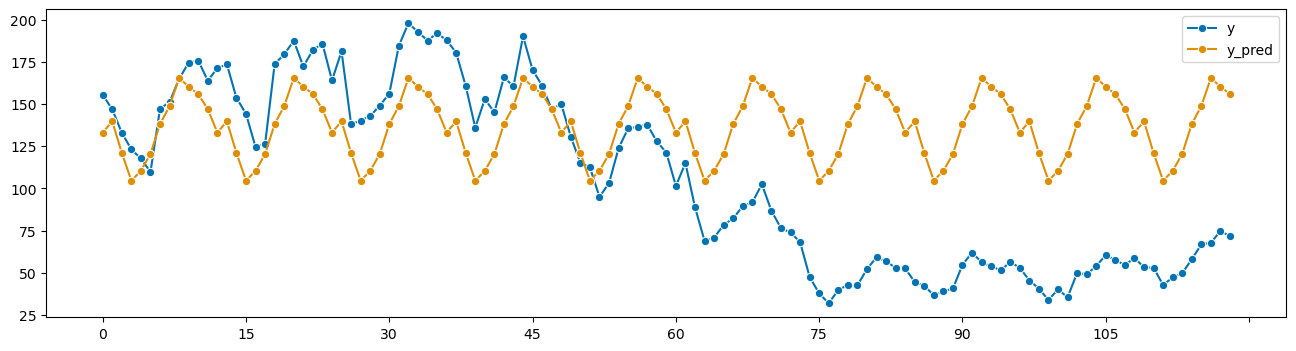

In [15]:
df_test = pd.DataFrame(test_data)
df_y_pred =  pd.DataFrame(y_pred)


plot_series(df_test, df_y_pred, labels=["y", "y_pred"])